In [1]:
from circuit_new import RotatedSurfaceCode
from qiskit import execute, Aer
import qiskit.providers.aer.noise as noise

In [2]:
simulator = Aer.get_backend('qasm_simulator')

In [3]:
"""
Noise Model Generator
"""
def get_noise(p1,p2):

    prob_1 = p1  # 1-qubit gate
    prob_2 = p2   # 2-qubit gate

    # Depolarizing quantum errors
    error_1 = noise.depolarizing_error(prob_1, 1)
    error_2 = noise.depolarizing_error(prob_2, 2)

    # Add errors to noise model
    noise_model = noise.NoiseModel()
    noise_model.add_all_qubit_quantum_error(error_1, ['u1', 'u2', 'u3'])
    noise_model.add_all_qubit_quantum_error(error_2, ['cx'])
    
    return noise_model

## Generating the Circuit

In [4]:
"""
d - Code Distance
T - # of Measurement Rounds
"""

d = 3
T = 3
code = RotatedSurfaceCode(d, T)

curr MQB: 8
curr DQB: 9


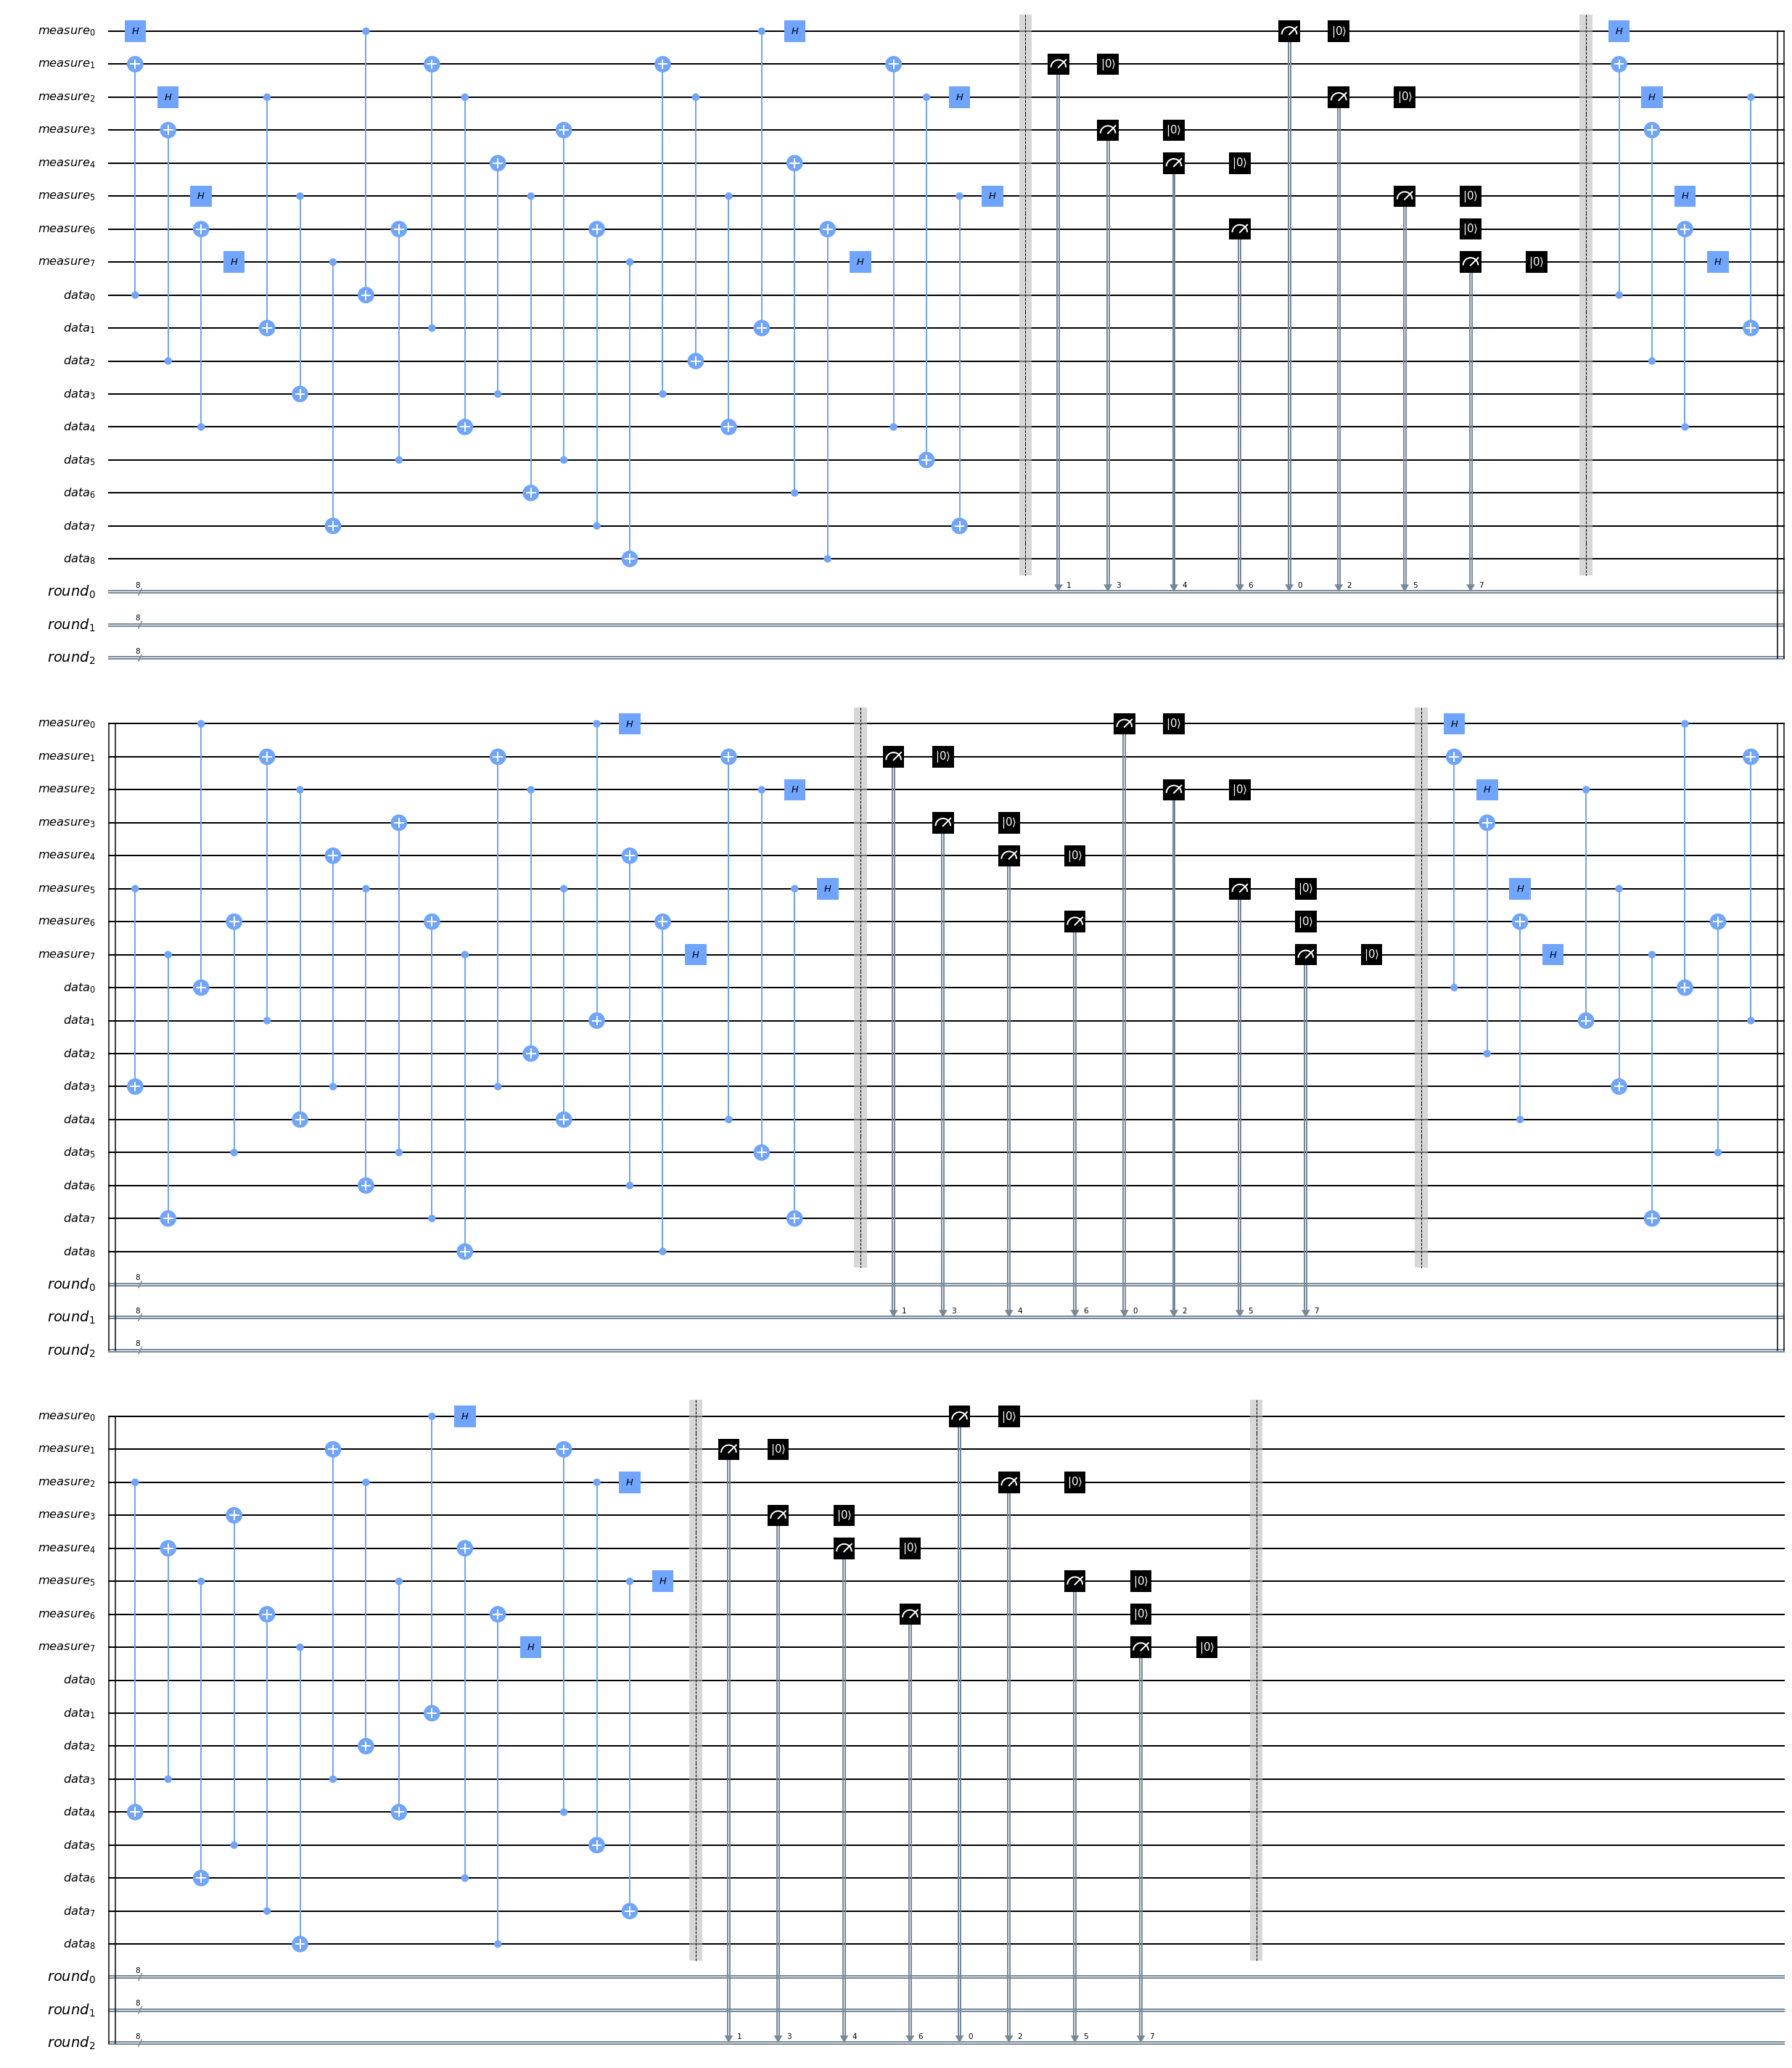

In [5]:
code.circuit.draw(output='mpl', fold=50)

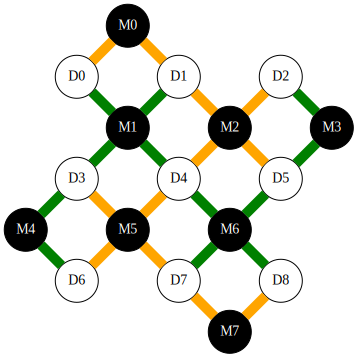

In [6]:
code.draw_lattice()

## No Noise Model

In [7]:
execute(code.circuit, simulator, noise_model=get_noise(0, 0)).result().get_counts()

# raw_results = job.result().get_counts()
# print(raw_results)
# code.print_result(raw_results)

{'10100100 10100100 10100100': 60,
 '00000000 00000000 00000000': 77,
 '10000000 10000000 10000000': 64,
 '10100000 10100000 10100000': 48,
 '10100101 10100101 10100101': 74,
 '00100001 00100001 00100001': 64,
 '00000100 00000100 00000100': 68,
 '00000001 00000001 00000001': 63,
 '10000101 10000101 10000101': 55,
 '10000100 10000100 10000100': 65,
 '10100001 10100001 10100001': 56,
 '00100100 00100100 00100100': 51,
 '00000101 00000101 00000101': 65,
 '10000001 10000001 10000001': 71,
 '00100000 00100000 00100000': 63,
 '00100101 00100101 00100101': 80}

## With Noise Model

In [9]:
job = execute(code.circuit, simulator, noise_model=get_noise(0.5, 0.5), shots=1)

# raw_results = job.result().get_counts()

code.print_result(raw_results)

M0: 0 M1: 1 M2: 1 M3: 0 M4: 0 M5: 1 M6: 1 M7: 1 
M0: 1 M1: 0 M2: 0 M3: 0 M4: 1 M5: 1 M6: 1 M7: 1 
M0: 1 M1: 1 M2: 0 M3: 0 M4: 0 M5: 0 M6: 1 M7: 1 
